In [185]:
import pandas as pd
import seaborn as sns

In [186]:
data = pd.read_csv("diabetes.csv")

In [187]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

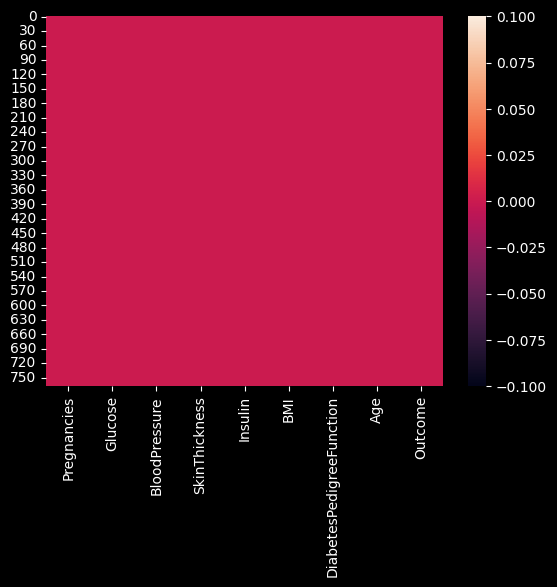

In [188]:
sns.heatmap(data.isnull())

In [189]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [190]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

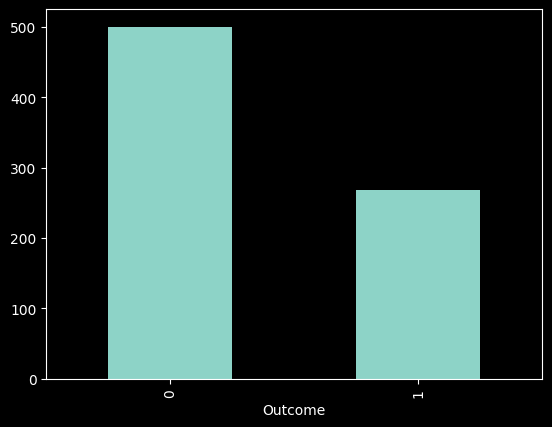

In [191]:
data['Outcome'].value_counts().plot(kind='bar')

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [193]:
#Lucas Cooke
#split into target and predictor
y = data["Outcome"]
x = data.drop(["Outcome"], axis=1)

In [194]:
#normalize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [195]:
#split our data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=22)

In [196]:
#Lucas Cooke
#train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [197]:
#Lucas Cooke
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [198]:
y_test

645    0
767    0
31     1
148    0
59     0
      ..
575    0
360    1
46     0
454    0
215    1
Name: Outcome, Length: 231, dtype: int64

In [199]:
#Lucas Cooke
from sklearn.metrics import accuracy_score

In [200]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7705627705627706


In [201]:
from sklearn.pipeline import Pipeline

In [202]:
pipe = Pipeline ([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, solver="liblinear"))
])

In [203]:
param_grid = {
    "lr__C": [0.01, 0.1, 1, 10, 100],
    "lr__penalty": ["l1", "l2"]
}

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    n_jobs=-1
)

In [206]:
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)

Best params:  {'lr__C': 10, 'lr__penalty': 'l2'}


In [207]:
from sklearn.metrics import classification_report
y_pred_optimized = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_optimized)
print("Test accuracy:", accuracy)
print(classification_report(y_test, y_pred_optimized))

Test accuracy: 0.7705627705627706
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [208]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix (y_test, y_pred)
conf_mat

array([[133,  17],
       [ 36,  45]])

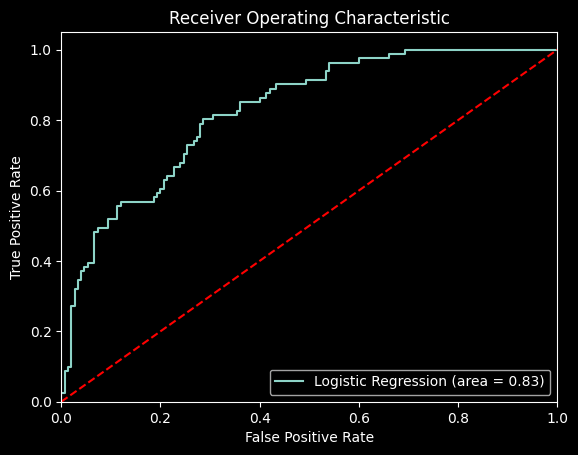

In [209]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# use predicted probabilities for the positive class
y_score = lr.predict_proba(X_test)[:, 1]

logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [211]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[:20])


[0.48336717 0.06541586 0.50951624 0.70235923 0.17431037 0.30592698
 0.15199632 0.11406955 0.29783556 0.03426791 0.17099712 0.28891292
 0.10611468 0.92919622 0.10168831 0.33152604 0.04210812 0.46051507
 0.38161513 0.15011919]
